In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pymc as pm
import arviz as az

## Parameters

In [8]:
DATA_PATH = Path("../data")
SEED = sum(map(ord, "Statistical Rethinking, Lecture 3"))

In [9]:
rng = np.random.default_rng(seed=SEED)

## Heigh vs Weight model

### Data

In [6]:
df_how = pd.read_csv(DATA_PATH / "Howell1.csv", sep=";")

In [7]:
df_how.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


### Generative Model

In [10]:
def sim_weights(hs, b, sd):
    U = rng.normal(loc=0, scale=sd, size=len(hs))
    W = b*hs + U
    return W

In [11]:
hs = rng.uniform(low=130, high=170, size=200)
W = sim_weights(hs, b=0.5, sd=5)

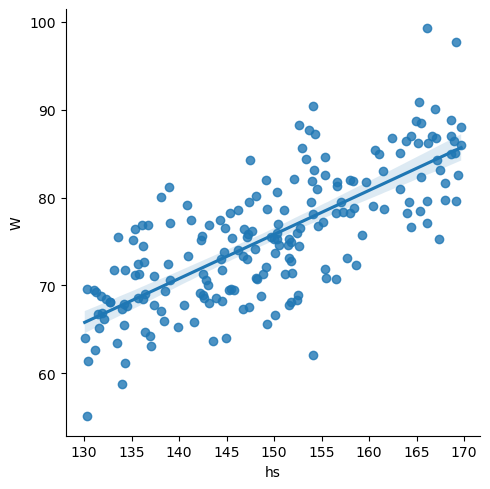

In [14]:
sns.lmplot(
    data=pd.DataFrame(np.c_[hs, W], columns=["hs", "W"]),
    x="hs",
    y="W"
)

### Statistical Model